Loaded 240 images of class CHEETAH
Loaded 238 images of class OCELOT
Loaded 236 images of class SNOW LEOPARD
Loaded 190 images of class CARACAL
Loaded 233 images of class LIONS
Loaded 241 images of class PUMA
Loaded 242 images of class TIGER
Loaded 1620 images total.
x shape: (1620, 224, 224, 3), y shape:(1620, 7)


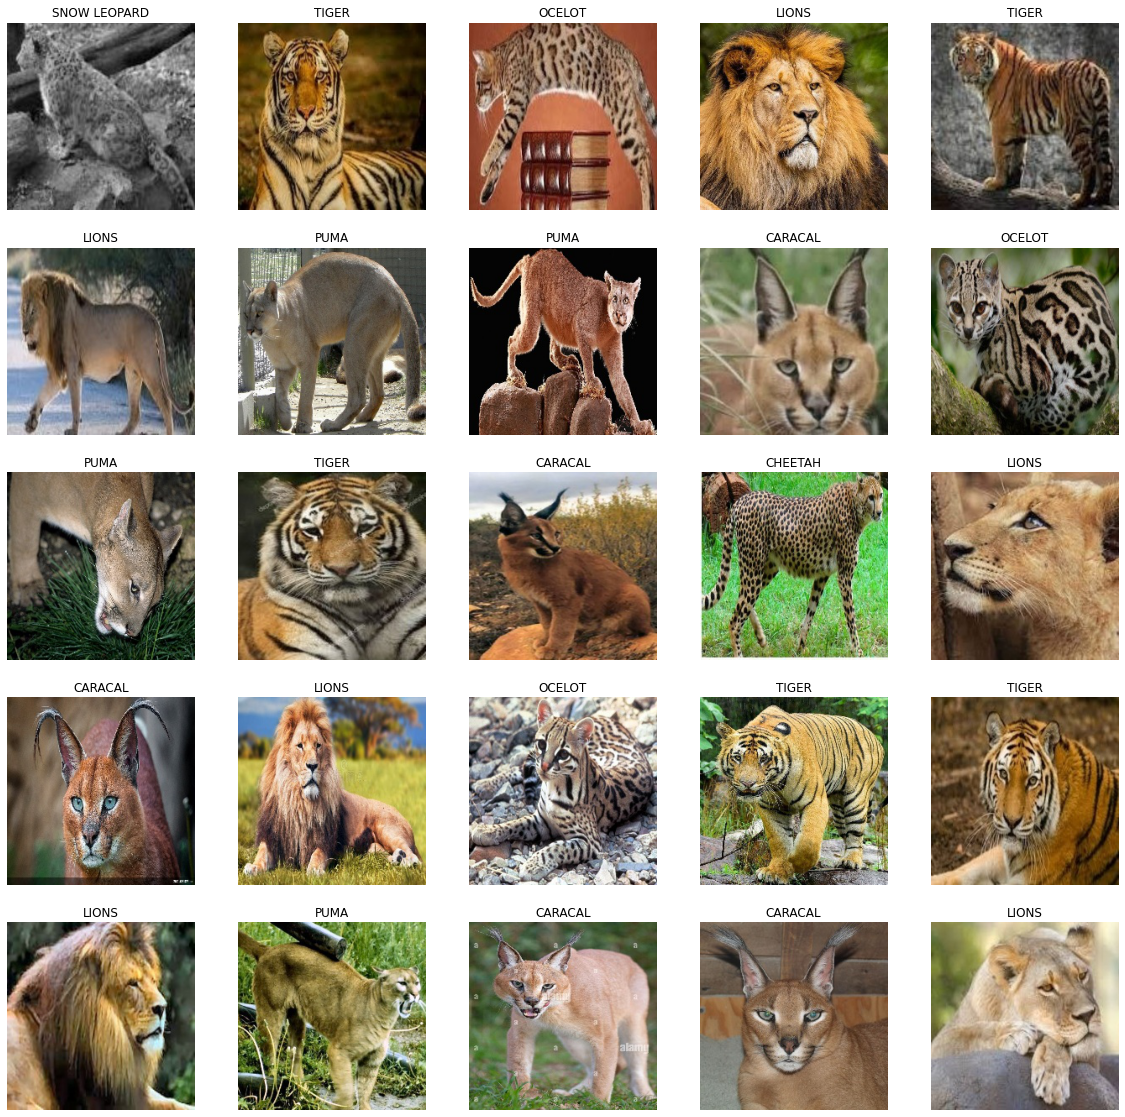

In [1]:
# Import libraries
import sys, os

# Download the dataset
utils_path = 'C:\\Users\\Gabriele\\Documents\\USI\\Machine learning\\Assignments\\Assignment 2\\as2_grida_gabriele\\src\\'
sys.path.append(utils_path)

image_path = 'C:\\Users\\Gabriele\\Documents\\USI\\Machine learning\\Assignments\\Assignment 2\\as2_grida_gabriele\\deliverable\\dataset\\Wild Cats Dataset\\Wild Cats Dataset'
sys.path.append(image_path)

# Load the dataset
from utils import *

imgs, labels = load_imgs(image_path, ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
plot_sample(imgs, labels, 5, 5, resize=(224, 224))

Training, test samples: 1296, 324
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                                 
Total params: 19,285,127
Trainable params: 19,285,127
Non-trainable params: 0
_________________________________________________________________
11/11 [==============================] - 0s 22ms/step - loss: 2.4649 - accuracy: 0.2469
Test loss: 2.465 - Test accuracy: 0.247


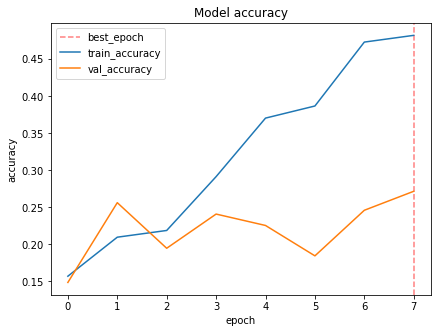

In [2]:
################### Task 1 ###################
# import libraries
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import utils
from keras.callbacks import EarlyStopping
from utils import *

# set a random seed
np.random.seed(123)

# split the indices of the data into training and test set
train_idx, test_idx = train_test_split(np.arange(x.shape[0]), train_size=0.8, shuffle=True)

# Normalize to 0-1 range
x_train, y_train = x[train_idx]/255., y[train_idx]
x_test, y_test = x[test_idx]/255., y[test_idx]

print('Training, test samples: {}, {}'.format(len(x_train), len(x_test)))

# Reshape to vectors
x_train = x_train.reshape((x_train.shape[0], -1)) # shape: (1296, 224*224*3)
x_test = x_test.reshape((x_test.shape[0], -1)) # shape: (324, 224*224*3)

# Set the number of classes
n_classes = 7

# Build a Feed Forward Neural Network
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
keras.utils.set_random_seed(123)

model_1 = Sequential()
model_1.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(n_classes, activation='softmax'))

# Store the number of parameters
fcnn_params = model_1.count_params()

# Compile the model
model_1.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model_1.summary()

# Define the Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)

# Train the model
batch_size = 32
epochs = 8
history = model_1.fit(x_train, 
                      y_train, 
                      shuffle=True,  
                      batch_size=batch_size, 
                      epochs=epochs, 
                      verbose=0,
                      callbacks=[early_stop],
                      validation_split=0.15)

# Save the model
save_keras_model(model_1, "Model_T1.h5")

# Load the model
load_keras_model("Model_T1.h5")

# Evaluate the model
scores = model_1.evaluate(x_test, y_test)
print('Test loss: {:.4} - Test accuracy: {:.3}'.format(*scores))

# Plot training and validation accuracy
def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    best_epoch = np.argmin(history.history['val_loss'])
    plt.axvline(best_epoch, label='best_epoch', c='r', ls='--', alpha=0.5)
    plt.plot(history.history['accuracy'], label='train_accuracy', c='C0')
    plt.plot(history.history['val_accuracy'], label='val_accuracy', c='C1')
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()

plot_history(history)


In [4]:
################### Task 1 Bonus ###################
# import libraries
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import utils
from keras.callbacks import EarlyStopping
from utils import *

# set a random seed
np.random.seed(123)

# split the indices of the data into training and test set
train_idx, test_idx = train_test_split(np.arange(x.shape[0]), train_size=0.8, shuffle=True)

# Normalize to 0-1 range
x_train, y_train = x[train_idx]/255., y[train_idx]
x_test, y_test = x[test_idx]/255., y[test_idx]

print('Training, test samples: {}, {}'.format(len(x_train), len(x_test)))
print('Training, test shapes: {}, {}'.format(x_train.shape, x_test.shape))

# 1) Extract features over the whole image
# Compute features for training set
x_train_mean = np.mean(x_train, axis=(1, 2, 3)) # Mean over the whole image
x_train_var = np.var(x_train, axis=(1, 2, 3)) # Variance over the whole image
x_train_min = np.min(x_train, axis=(1, 2, 3)) # Min value over the whole image
x_train_max = np.max(x_train, axis=(1, 2, 3)) # Max value over the whole image

# Stack features into a single array for training set
x_train_features = np.stack([x_train_mean, x_train_var, x_train_min, x_train_max], axis=-1)

# Compute features for test set
x_test_mean = np.mean(x_test, axis=(1, 2, 3)) 
x_test_var = np.var(x_test, axis=(1, 2, 3)) 
x_test_min = np.min(x_test, axis=(1, 2, 3)) 
x_test_max = np.max(x_test, axis=(1, 2, 3)) 

# Stack features into a single array for test set
x_test_features = np.stack([x_test_mean, x_test_var, x_test_min, x_test_max], axis=-1)

# Set the number of classes
n_classes = 7

# Build a Feed Forward Neural Network
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
keras.utils.set_random_seed(123)

model_2a = Sequential()
model_2a.add(Dense(128, activation='relu', input_shape=x_train_features.shape[1:]))
model_2a.add(Dense(128, activation='relu'))
model_2a.add(Dense(n_classes, activation='softmax'))

# Store the number of parameters
fcnn_params = model_2a.count_params()

# Compile the model
model_2a.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model_2a.summary()

# Define the Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)

# Train the model
batch_size = 32
epochs = 8
history = model_2a.fit(x_train_features, # Use features
                      y_train, 
                      shuffle=True,  
                      batch_size=batch_size, 
                      epochs=epochs, 
                      verbose=0,
                      callbacks=[early_stop],
                      validation_split=0.15)

# Evaluate the model
scores = model_2a.evaluate(x_test_features, y_test)
print('Test loss: {:.4} - Test accuracy: {:.3}'.format(*scores))


# 2) Extract features from each channel
# Calculate the mean, variance, min, and max for each color channel separately
x_mean_r = np.mean(x_train[:,:,:,0], axis=(1, 2))
x_mean_g = np.mean(x_train[:,:,:,1], axis=(1, 2))
x_mean_b = np.mean(x_train[:,:,:,2], axis=(1, 2))

x_var_r = np.var(x_train[:,:,:,0], axis=(1, 2))
x_var_g = np.var(x_train[:,:,:,1], axis=(1, 2))
x_var_b = np.var(x_train[:,:,:,2], axis=(1, 2))

x_min_r = np.min(x_train[:,:,:,0], axis=(1, 2))
x_min_g = np.min(x_train[:,:,:,1], axis=(1, 2))
x_min_b = np.min(x_train[:,:,:,2], axis=(1, 2))

x_max_r = np.max(x_train[:,:,:,0], axis=(1, 2))
x_max_g = np.max(x_train[:,:,:,1], axis=(1, 2))
x_max_b = np.max(x_train[:,:,:,2], axis=(1, 2))

# Calculate the ratio between the max of different channels
x_max_ratio_rg = x_max_r / x_max_g
x_max_ratio_rb = x_max_r / x_max_b
x_max_ratio_gb = x_max_g / x_max_b

# Stack these features together
x_train_features = np.stack([x_mean_r, x_mean_g, x_mean_b, 
                             x_var_r, x_var_g, x_var_b,
                             x_min_r, x_min_g, x_min_b,
                             x_max_r, x_max_g, x_max_b,
                             x_max_ratio_rg, x_max_ratio_rb, x_max_ratio_gb], axis=-1)

# Similarly, do the same thing for the test set
x_test_mean_r = np.mean(x_test[:,:,:,0], axis=(1, 2))
x_test_mean_g = np.mean(x_test[:,:,:,1], axis=(1, 2))
x_test_mean_b = np.mean(x_test[:,:,:,2], axis=(1, 2))

x_test_var_r = np.var(x_test[:,:,:,0], axis=(1, 2))
x_test_var_g = np.var(x_test[:,:,:,1], axis=(1, 2))
x_test_var_b = np.var(x_test[:,:,:,2], axis=(1, 2))

x_test_min_r = np.min(x_test[:,:,:,0], axis=(1, 2))
x_test_min_g = np.min(x_test[:,:,:,1], axis=(1, 2))
x_test_min_b = np.min(x_test[:,:,:,2], axis=(1, 2))

x_test_max_r = np.max(x_test[:,:,:,0], axis=(1, 2))
x_test_max_g = np.max(x_test[:,:,:,1], axis=(1, 2))
x_test_max_b = np.max(x_test[:,:,:,2], axis=(1, 2))

x_test_max_ratio_rg = x_test_max_r / x_test_max_g
x_test_max_ratio_rb = x_test_max_r / x_test_max_b
x_test_max_ratio_gb = x_test_max_g / x_test_max_b

x_test_features = np.stack([x_test_mean_r, x_test_mean_g, x_test_mean_b, 
                            x_test_var_r, x_test_var_g, x_test_var_b,
                            x_test_min_r, x_test_min_g, x_test_min_b,
                            x_test_max_r, x_test_max_g, x_test_max_b,
                            x_test_max_ratio_rg, x_test_max_ratio_rb, x_test_max_ratio_gb], axis=-1)

n_classes = 7

# Build a Feed Forward Neural Network
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
keras.utils.set_random_seed(123)

model_2b = Sequential()
model_2b.add(Dense(128, activation='relu', input_shape=x_train_features.shape[1:]))
model_2b.add(Dense(128, activation='relu'))
model_2b.add(Dense(n_classes, activation='softmax'))

# Store the number of parameters
fcnn_params = model_2b.count_params()

# Compile the model
model_2b.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model_2b.summary()

# Define the Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)

# Train the model
batch_size = 32
epochs = 8
history = model_2b.fit(x_train_features, # Use features
                      y_train, 
                      shuffle=True,  
                      batch_size=batch_size, 
                      epochs=epochs, 
                      verbose=0,
                      callbacks=[early_stop],
                      validation_split=0.15)

# Evaluate the model
scores = model_2b.evaluate(x_test_features, y_test)
print('Test loss: {:.4} - Test accuracy: {:.3}'.format(*scores))

# Save the best model
save_keras_model(model_2b, "Best_Model_Bonus1.h5")

# Load the best model
load_keras_model("Best_Model_Bonus1.h5")

Training, test samples: 1296, 324
Training, test shapes: (1296, 224, 224, 3), (324, 224, 224, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               640       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 7)                 903       
                                                                 
Total params: 18,055
Trainable params: 18,055
Non-trainable params: 0
_________________________________________________________________
11/11 [==============================] - 0s 2ms/step - loss: 1.8972 - accuracy: 0.1914
Test loss: 1.897 - Test accuracy: 0.191
Model: "sequential_4"
_________________________________________________________________
 L

Training, validation, test samples: 1134, 243, 243
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 av

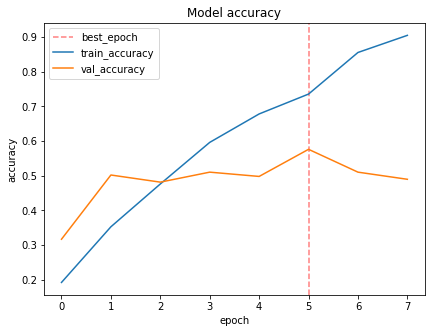

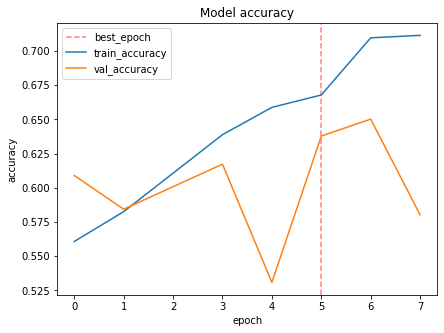

In [5]:
################### Task 2 ###################
# import libraries
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow import keras
from tensorflow.keras import utils
from keras.callbacks import EarlyStopping
from utils import *

# set a random seed
np.random.seed(123)

# split the indices of the data into training and non-training set
train_idx, non_train_idx = train_test_split(np.arange(x.shape[0]), train_size=0.7, shuffle=True)
# split the indices of the non-training set into test and validation set
val_idx, test_idx = train_test_split(non_train_idx, test_size=0.5, shuffle=True)

# Normalize to 0-1 range
x_train, y_train = x[train_idx]/255., y[train_idx]
x_val, y_val = x[val_idx]/255., y[val_idx]
x_test, y_test = x[test_idx]/255., y[test_idx]

print('Training, validation, test samples: {}, {}, {}'.format(len(x_train), len(x_val), len(x_test)))

# Set the number of classes
n_classes = 7

# Build a Convolutional Neural Network
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
keras.utils.set_random_seed(123)

model_3 = Sequential()
model_3.add(Conv2D(16, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2, 2))) 
model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(AveragePooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(7, activation='softmax'))

# Store the number of parameters
cnn_params = model_3.count_params()

# Compile the model
model_3.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

model_3.summary()

# Define the Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)

# Train the model
batch_size = 32
epochs = 8
history = model_3.fit(x_train, 
                      y_train, 
                      shuffle=True,  
                      batch_size=batch_size, 
                      epochs=epochs, 
                      verbose=1,
                      callbacks=[early_stop],
                      validation_data=(x_val, y_val))


# Evaluate the model
scores = model_3.evaluate(x_test, y_test)
print('Test loss: {:.4} - Test accuracy: {:.3}'.format(*scores))

# Plot training and validation accuracy
def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    best_epoch = np.argmin(history.history['val_loss'])
    plt.axvline(best_epoch, label='best_epoch', c='r', ls='--', alpha=0.5)
    plt.plot(history.history['accuracy'], label='train_accuracy', c='C0')
    plt.plot(history.history['val_accuracy'], label='val_accuracy', c='C1')
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()

plot_history(history)

# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator
train_gen = ImageDataGenerator(channel_shift_range=0.3,   # random channel shifts
                               rotation_range=20,         # randomly rotates images in the range
                               zoom_range=0.1,            # zoom in/out randomly
                               shear_range=15,            # deformation
                               horizontal_flip=True,      # randomly flip images
                              )

val_gen = ImageDataGenerator()

# Train the model
batch_size = 32
epochs = 8

train_loader = train_gen.flow(x_train, y_train, batch_size=batch_size)
val_loader = val_gen.flow(x_val, y_val, batch_size=x_val.shape[0])

history = model_3.fit(train_loader,
                      steps_per_epoch=x_train.shape[0]//batch_size,
                      epochs= epochs, 
                      validation_data=val_loader,
                      validation_steps=1,
                      callbacks=[early_stop])

# Save the model
save_keras_model(model_3, "Model_T2.h5")

# Load the model
load_keras_model("Model_T2.h5")

# Evaluate the model
scores = model_3.evaluate(x_test, y_test)
print('Test loss: {:.4} - Test accuracy: {:.3}'.format(*scores))

plot_history(history)

In [7]:
################### Task 2 Bonus ###################
# import libraries
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow import keras
from tensorflow.keras import utils
from keras.callbacks import EarlyStopping
from utils import *
from tensorflow.keras.optimizers import Adam

# set a random seed
np.random.seed(123)

# split the indices of the data into training and non-training set
train_idx, non_train_idx = train_test_split(np.arange(x.shape[0]), train_size=0.7, shuffle=True)
# split the indices of the non-training set into test and validation set
val_idx, test_idx = train_test_split(non_train_idx, test_size=0.5, shuffle=True)

# Normalize to 0-1 range
x_train, y_train = x[train_idx]/255., y[train_idx]
x_val, y_val = x[val_idx]/255., y[val_idx]
x_test, y_test = x[test_idx]/255., y[test_idx]

print('Training, validation, test samples: {}, {}, {}'.format(len(x_train), len(x_val), len(x_test)))

# Set the number of classes
n_classes = 7

# Define the function to create model
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
keras.utils.set_random_seed(123)

def create_model(optimizer): # set the learning rate
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    if optimizer == 'Adam_0.001':
        opt = Adam(learning_rate=0.001)
    elif optimizer == 'Adam_0.01':
        opt = Adam(learning_rate=0.01)
        
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])
    return model
    
# Define the list of parameters to optimize
epochs_list = [8, 10, 12]
optimizer_list = ['Adam_0.001', 'Adam_0.01']

# Initialize varibales
best_score = 0
best_epochs = 0
best_optimizer = ''

# Iterate over all the hyperparameters
for epochs in epochs_list:
    for optimizer in optimizer_list:
        print("Training model with epochs={} and optimizer={}".format(epochs, optimizer))

        # Create a new model with the current hyperparameters
        model_4 = create_model(optimizer)

        # Define the Early Stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0)

        # Train the model
        model_4.fit(x_train,
                  y_train,
                  shuffle=True,
                  batch_size=32,
                  epochs=epochs,
                  verbose=1,
                  callbacks=[early_stop],
                  validation_data=(x_val, y_val))

        # Evaluate the model
        scores = model_4.evaluate(x_test, y_test)
        print('Test loss: {:.4} - Test accuracy: {:.3}'.format(*scores))
        
        # If the accuracy improves, we update the best hyperparameters and save the current model
        if scores[1] > best_score:
            best_score = scores[1]
            best_epochs = epochs
            best_optimizer = optimizer
            best_model = model_4

print("Best score: {}, Best epochs: {}, Best optimizer: {}".format(best_score, best_epochs, best_optimizer))

# Save the best model
save_keras_model(best_model, "Best_Model_Bonus2.h5")

# Load the best model
load_keras_model("Best_Model_Bonus2.h5")

Training, validation, test samples: 1134, 243, 243
Training model with epochs=8 and optimizer=Adam_0.001
Epoch 1/8
36/36 [==============================] - 30s 786ms/step - loss: 1.9129 - accuracy: 0.1922 - val_loss: 1.7553 - val_accuracy: 0.3169
Epoch 2/8
36/36 [==============================] - 27s 760ms/step - loss: 1.6535 - accuracy: 0.3527 - val_loss: 1.4507 - val_accuracy: 0.5021
Epoch 3/8
36/36 [==============================] - 28s 778ms/step - loss: 1.3645 - accuracy: 0.4762 - val_loss: 1.3342 - val_accuracy: 0.4815
Epoch 4/8
36/36 [==============================] - 28s 785ms/step - loss: 1.0803 - accuracy: 0.5961 - val_loss: 1.2926 - val_accuracy: 0.5103
Epoch 5/8
36/36 [==============================] - 28s 765ms/step - loss: 0.8706 - accuracy: 0.6781 - val_loss: 1.4068 - val_accuracy: 0.4979
Epoch 6/8
36/36 [==============================] - 28s 765ms/step - loss: 0.7286 - accuracy: 0.7354 - val_loss: 1.1393 - val_accuracy: 0.5761
Epoch 7/8
36/36 [==========================